# Lab Task:

####  Model: Build and train a custom CNN with the following structure:

Conv2D(64 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(128 filters, (3×3), ReLU) → BatchNormalization → MaxPooling2D(2×2)

Conv2D(256 filters, (3×3), ReLU) → Dropout(0.3) → MaxPooling2D(2×2)

Flatten → Dense(256, ReLU) → Dropout(0.5) → Dense(1, Sigmoid)

#### Dataset: Use only two classes:

from the last lab tasks

#### Compile with: binary_crossentropy loss and adam optimizer.

#### Train and evaluate the model.

In [1]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
from tensorflow.keras import layers, models

model = models.Sequential()

In [2]:
checkpoints = r'C:\Users\Muhammad Luqman\Desktop\lab-12-21jzele0444\E1-cp-{epoch:04d}-loss{val_loss:.2f}.h5'

In [3]:
train_dir = r'C:\Users\Muhammad Luqman\Desktop\lab-11-21jzele0444\computer vision\train'
validation_dir = r'C:\Users\Muhammad Luqman\Desktop\lab-11-21jzele0444\computer vision\validation'
test_dir = r'C:\Users\Muhammad Luqman\Desktop\lab-11-21jzele0444\computer vision\test'

In [4]:
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 batch_normalization_1 (Batc  (None, 29, 29, 128)      512       
 hNormalization)                                                 
                                                        

In [6]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(1e-4), metrics=['acc'])

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(64, 64), batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(64, 64),batch_size=32,class_mode='binary')

Found 240 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [8]:
EpochCheckpoint = ModelCheckpoint(checkpoints,
                             monitor="val_loss",
                             save_best_only=True, 
                             verbose=1)
callbacks = [EpochCheckpoint]

In [9]:
step_size_train = train_generator.n//train_generator.batch_size

model_history = model.fit(train_generator,
                    validation_data =validation_generator,
                   steps_per_epoch=step_size_train,
                   epochs=30,
                   callbacks=callbacks)
                  

Epoch 1/30
7/7 [==============================] - ETA: 0s - loss: 2.8385 - acc: 0.5337
Epoch 1: val_loss improved from inf to 0.69104, saving model to C:\Users\Muhammad Luqman\Desktop\lab-12-21jzele0444\E1-cp-0001-loss0.69.h5
7/7 [==============================] - 6s 660ms/step - loss: 2.8385 - acc: 0.5337 - val_loss: 0.6910 - val_acc: 0.6500
Epoch 2/30
7/7 [==============================] - ETA: 0s - loss: 0.7270 - acc: 0.6786
Epoch 2: val_loss improved from 0.69104 to 0.69032, saving model to C:\Users\Muhammad Luqman\Desktop\lab-12-21jzele0444\E1-cp-0002-loss0.69.h5
7/7 [==============================] - 5s 654ms/step - loss: 0.7270 - acc: 0.6786 - val_loss: 0.6903 - val_acc: 0.5333
Epoch 3/30
7/7 [==============================] - ETA: 0s - loss: 0.5115 - acc: 0.7260
Epoch 3: val_loss did not improve from 0.69032
7/7 [==============================] - 4s 633ms/step - loss: 0.5115 - acc: 0.7260 - val_loss: 0.6912 - val_acc: 0.5000
Epoch 4/30
7/7 [==============================] - ETA

In [10]:
model_history.history

{'loss': [2.8384976387023926,
  0.7269963622093201,
  0.5115076899528503,
  0.3785087764263153,
  0.5770145058631897,
  0.3596484065055847,
  0.3013085126876831,
  0.24400068819522858,
  0.32931071519851685,
  0.1821986734867096,
  0.2008717954158783,
  0.3927660584449768,
  0.10671588033437729,
  0.06821282207965851,
  0.23431727290153503,
  0.05671432986855507,
  0.09944130480289459,
  0.11849900335073471,
  0.35314100980758667,
  0.0818437859416008,
  0.07868123054504395,
  0.031213633716106415,
  0.023477602750062943,
  0.04523927718400955,
  0.07034993916749954,
  0.0617675855755806,
  0.08892419934272766,
  0.15614746510982513,
  0.012858903966844082,
  0.01525637973099947],
 'acc': [0.5336538553237915,
  0.6785714030265808,
  0.7259615659713745,
  0.8605769276618958,
  0.8028846383094788,
  0.8605769276618958,
  0.870192289352417,
  0.9134615659713745,
  0.8413461446762085,
  0.9278846383094788,
  0.8894230723381042,
  0.8214285969734192,
  0.9759615659713745,
  0.98557692766189

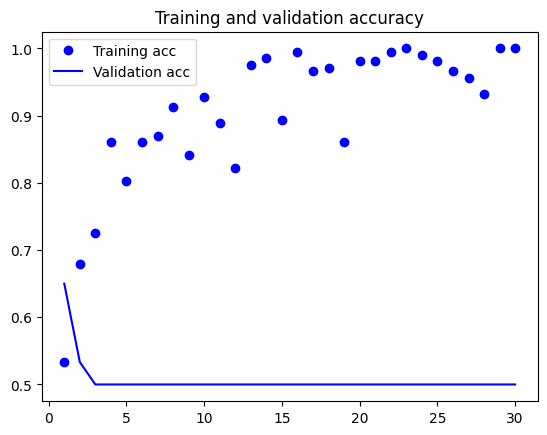

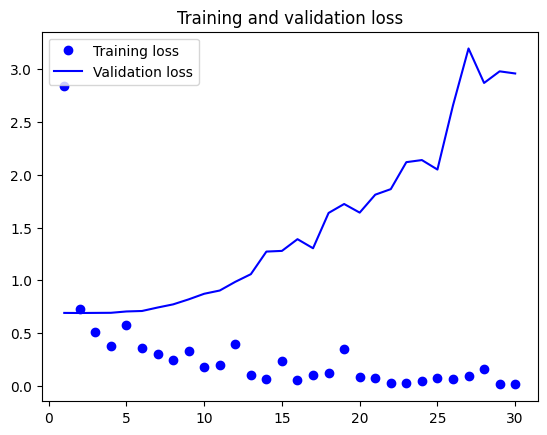

<Figure size 640x480 with 0 Axes>

In [11]:
acc = model_history.history['acc']
val_acc = model_history.history['val_acc']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.savefig(r'C:\Users\Muhammad Luqman\Desktop\lab-11-21jzele0444\model_Accuracy.png')

In [12]:
model.save(r'C:\Users\Muhammad Luqman\Desktop\lab-11-21jzele0444\E1-cp-0012-loss0.21.h5')

Found 20 images belonging to 2 classes.
1/1 [==============================] - 0s 250ms/step


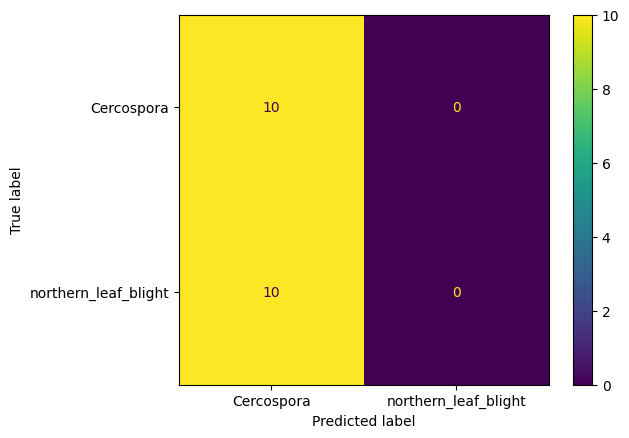

In [13]:
#model = load_model(r'C:\Users\Administrator\Downloads\ML Lab\Computer vision\lab11\model_lab11.h5')
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(64, 64), batch_size=32, shuffle=False, class_mode='binary')
label=test_generator.labels
preds=model.predict(test_generator)
pred = np.argmax(preds, axis = 1)
cm = confusion_matrix(label, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=['Cercospora',  'northern_leaf_blight'])
disp.plot()
plt.show()
#plt.savefig(r'C:\Users\Muhammad Luqman\Desktop\lab-11-21jzele0444\confusion_matrics.jpg')

In [14]:
from sklearn.metrics import classification_report

print(classification_report(label, pred, 
                            target_names=['Cercospora', 'northern_leaf_blight'], 
                            zero_division=0))


                      precision    recall  f1-score   support

          Cercospora       0.50      1.00      0.67        10
northern_leaf_blight       0.00      0.00      0.00        10

            accuracy                           0.50        20
           macro avg       0.25      0.50      0.33        20
        weighted avg       0.25      0.50      0.33        20

